In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import string
import matplotlib.image as mpimg
file_path_darker = "Fifty-Shades-Darker.txt"
file_path_foul_words = "full-list-of-bad-words_text-file_2022_05_05.txt"
file_path_grey = "E_L_James - 01 - Fifty_Shades_of_Grey.txt"
file_img_darker = "50-shades-darker-img.jpg"
file_img_grey = "50-shades-of-grey-img.jpg"


In [2]:
#file_contents1
def clean_text(file):
    removed_spaces_list = list()
    def remove_all_punctuation(my_text): 
        new_string = ''
        for letters in my_text: 
            if letters in set(string.punctuation):
                continue
            else:
                new_string+=letters
        return new_string
    for lines in file:
        remove_spaces = lines.replace('\x0c','').strip().lower()
        split_remove_space = remove_spaces.split()
        cleaned_words = [word.strip(string.punctuation) for word in split_remove_space]
        clean_up_sentences = ' '.join(cleaned_words)
        removed_spaces_list.append(remove_all_punctuation(clean_up_sentences))
    return removed_spaces_list
    
#removed_spaces_list
#clean_text(file_contents1)

In [3]:
def count_foul_words(file, foul_list):
    foul_word_counts = dict()
    for sentence in file: 
        splitted_sentence = sentence.split()
        for word in splitted_sentence:
            if word in foul_list:
                if word not in foul_word_counts.keys():
                    foul_word_counts[word] = 1
                else:
                    foul_word_counts[word] +=1
    return sorted(foul_word_counts.items(), key = lambda x:x[1],reverse = True)[:10]

In [4]:
def frequency_plot(freq_dict,title,img_path):
    fig, ax = plt.subplots(figsize=(16,10))
    x= [y[1] for y in freq_dict]
    labels = [y[0] for y in freq_dict]
    image = plt.imread(img_path)
    ax.imshow(image, alpha=0.5, extent = [0,max(x)+1,0,len(labels)], aspect = 'auto', origin = 'lower')
    ax.barh(labels,x)
    ax.invert_yaxis();
    ax.set_ylabel('Most common foul words')
    ax.set_xlabel('Frequency')
    ax.set_title(title)
    

In [5]:
def combine_together(file, foul_lists,title,img_path):
    input_file = clean_text(file)
    total_count = count_foul_words(input_file,foul_lists)
    frequency_plot(total_count,title,img_path)

In [6]:
def open_book(file_path, img_path):
    file_obj = open(file_path)
    file_obj_foul = open(file_path_foul_words)
    file_contents = file_obj.readlines()
    file_contents_foul = file_obj_foul.readlines()
    file_obj.close()
    file_obj_foul.close()
    list_of_foul_words = file_contents_foul[14:len(file_contents_foul)-2]
    remove_new_line = [word.replace('\n', '') for word in list_of_foul_words]
    list_of_foul_words = remove_new_line
    title = file_path.split('\\')[-1].replace('.txt', '')
    combine_together(file_contents, list_of_foul_words, title,img_path)


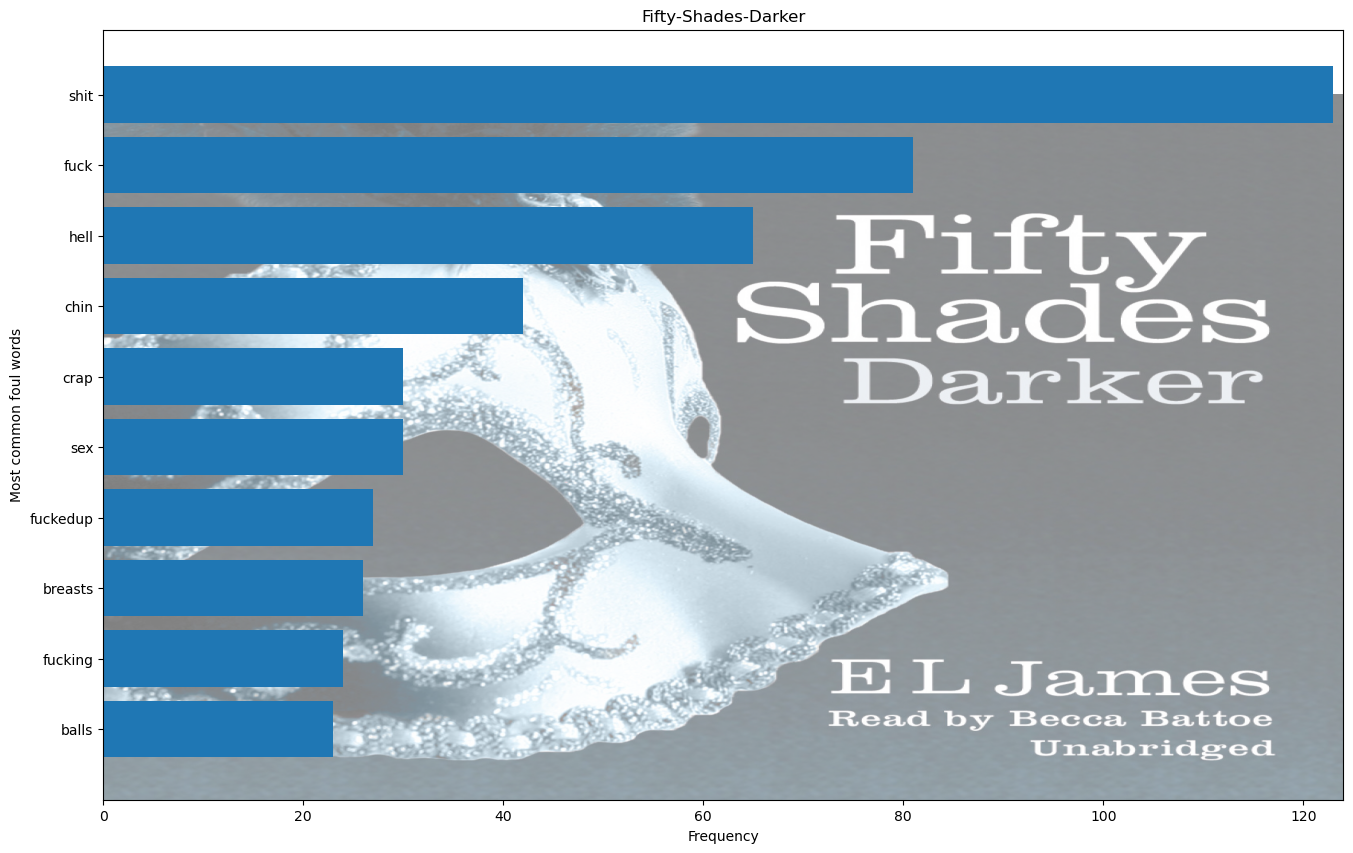

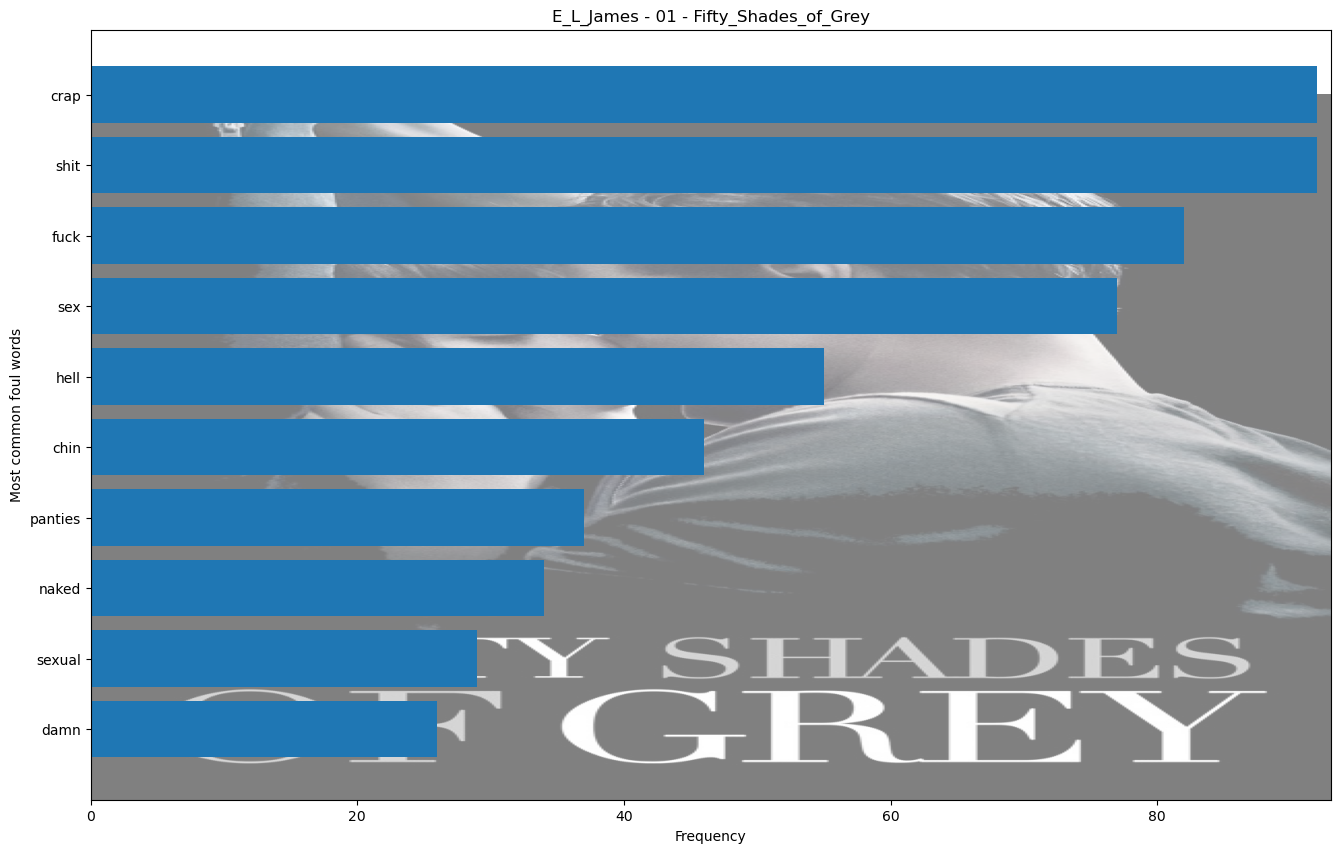

In [7]:
open_book(file_path_darker,file_img_darker) #file 1
open_book(file_path_grey,file_img_grey) #file 2